In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [2]:
iris_df = pd.read_csv("iris-data.csv")

In [3]:
iris_df.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
#the first step is to review if I have nulls in my dataset. I can see that there are 5 nulls in the "petal_width_cm" column.
iris_df.isnull().sum()

sepal_length_cm    0
sepal_width_cm     0
petal_length_cm    0
petal_width_cm     5
class              0
dtype: int64

In [5]:
#Now that I know that I have nulls, I have to identify them, and see the entire row in order to decide if it is better to 
#eliminate the entire row or replace the NaN value with the mean. 
null_values = iris_df[iris_df["petal_width_cm"].isnull()]
null_values

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
7,5.0,3.4,1.5,NaN,Iris-setosa
8,4.4,2.9,1.4,NaN,Iris-setosa
9,4.9,3.1,1.5,NaN,Iris-setosa
10,5.4,3.7,1.5,NaN,Iris-setosa
11,4.8,3.4,1.6,NaN,Iris-setosa


In [6]:
#Now that I see that the rest of the columns have values that seem to have correct values, I decide to keep the rows since 
#the dataset is not that big, and I prefer to keep as much information as possible. 
#In this case I will replace the NaN with the mean. 
# Since all the NaN are from the same class, I will use the mean of that class.
mean_iris_setosa = iris_df[iris_df["class"] == "Iris-setosa"]["petal_width_cm"].mean()
mean_iris_setosa

0.25

In [7]:
iris_df['petal_width_cm'] = iris_df['petal_width_cm'].fillna(mean_iris_setosa)

In [8]:
#Now my dataset has no NaN values
iris_df.isnull().sum()

sepal_length_cm    0
sepal_width_cm     0
petal_length_cm    0
petal_width_cm     0
class              0
dtype: int64

In [9]:
#Since I have one categorical feature, I want to review all the entries, in order to review that the entries in the "class" column are unified. 
iris_df['class'].value_counts()

Iris-virginica     50
Iris-setosa        49
Iris-versicolor    45
versicolor          5
Iris-setossa        1
Name: class, dtype: int64

In [10]:
#We can see that there are two classes that are duplicated because either they were entered with typo error 
#(like Irirs_setossa that has an extra "s") or simply because the same "class" can be entered differently by each source 
#(example someone entered "Iris-versicolor", while others entered the information as "versicolor"). 
#This is very common in real life datasets.
#I will keep the name "Iris-versicolor" as is the one that seems the standard. 
iris_df['class'] = iris_df['class'].replace(['versicolor','Iris-setossa'],['Iris-versicolor','Iris-setosa'])
iris_df['class'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64

In [11]:
#Now that I have my ""clas" data standarized, I can start a visual exploratory analisys, 
#to review values that are might have been wrongly entered or that are simply outliers.
# I will use describe() to check the mean, min and max of each column to first identify possible weird values that I can study more in detail with visuals.
iris_df.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,150.000000,150.000000,150.000000,150.000000
mean,5.644627,3.054667,3.758667,1.203667
std,1.312781,0.433123,1.764420,0.763252
min,0.055000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.700000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<Figure size 1224x648 with 0 Axes>

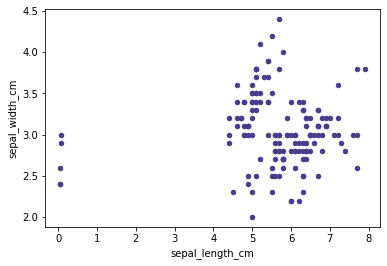

In [12]:
#From the information above, I can see that in columm "sepal_lengh_cm" there seems to be at least one value (the min) really out of range, so I will plot my sepal columns to check how my data looks like.
plt.figure(figsize=(17,9))
iris_df.plot(kind='scatter',x='sepal_length_cm', y='sepal_width_cm',color='darkslateblue')
plt.show()

In [13]:
#I can see that there are 4 values that are completely out of range in "sepal_lenght_cm". 
#To identify them, I will make a filter for all values that are less than 4 in the column. 

outlier_sepal = iris_df[iris_df["sepal_length_cm"] < 4]
outlier_sepal

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
77,0.067,3.0,5.0,1.7,Iris-versicolor
78,0.060,2.9,4.5,1.5,Iris-versicolor
79,0.057,2.6,3.5,1.0,Iris-versicolor
80,0.055,2.4,3.8,1.1,Iris-versicolor
81,0.055,2.4,3.7,1.0,Iris-versicolor


In [19]:
#There are 5 values that seem to have an error, it is most likely that they were not transform to cm and are in mts. So I will #convert them, by multiplying them by 100

#def convert_cm (array):
    
outlier_sepal[outlier_sepal["sepal_length_cm"] < 4] = 100 * outlier_sepal["sepal_length_cm"] 
outlier_sepal

C:\Users\irene\AppData\Local\Temp\ipykernel_40112\2720268870.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outlier_sepal[outlier_sepal["sepal_length_cm"] < 4] = 100 * outlier_sepal["sepal_length_cm"]


,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
77,6.7,3.0,5.0,1.7,Iris-versicolor
78,6.0,2.9,4.5,1.5,Iris-versicolor
79,5.7,2.6,3.5,1.0,Iris-versicolor
80,5.5,2.4,3.8,1.1,Iris-versicolor
81,5.5,2.4,3.7,1.0,Iris-versicolor
